<h1>Decision Trees</h1>

___

Decision Trees is a supervised algorithm that can be used for regression and classification models. The idea behind Decision trees is that we partition the feature space into regions that classify the data. Our ultimate goal is for each region to become are pure as possible. Meanwhile, as the nodes become pure, we gather information of the nodes that will ultimately help us. But what is purity?

Purity is measurement of a selected sample of a dataset all belonging to the same class. When we describe a node as being pure, we are saying that ALL the data in that subsection belongs to the same class. On the other hand, when we describe a node as being inpure, we are saying that not all the data is of the same type and therefore there is still work to be done to make them pure. 

As we go through the tree, the tree is partitioned in a manner that maximizes the information gain. This is done using the concept of entropy.

Entropy is the measurement of uncertainty, and the goal is to reduce this uncertainty.  

information gain = entropy(parent)−[weighted average]entropy(children)


$$−∑ipilog2(pi)$$



The leafs of the tree coresponds to the predictive labels that the information will give. We can stop at a given node when the node has become pure. 
	
It is important to keep in mind that this model, like any model, is prone to overfitting. To avoid this, controlling the maximum tree depth or ¬or minimum number of samples required in a split hyperparameters is the easiest way to counteract overfitting. Lets see how well Decision Trees do in the make_circles dataset.

___

<h1>Load Dataset</h1>

In [146]:
from sklearn.datasets import make_circles
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


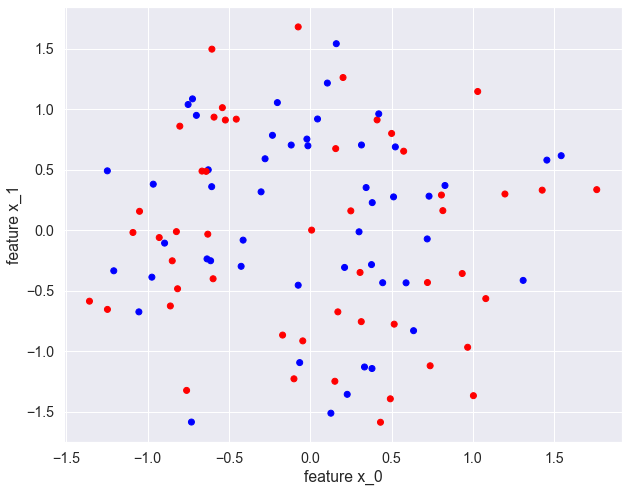

In [147]:
X, y = make_circles(noise = 0.4, random_state=5)

colors = ["red" if label == 0 else "blue" for label in y]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()

Lets split our data into two datsets: training and testing. In this case, we will set our test size to 40/60.

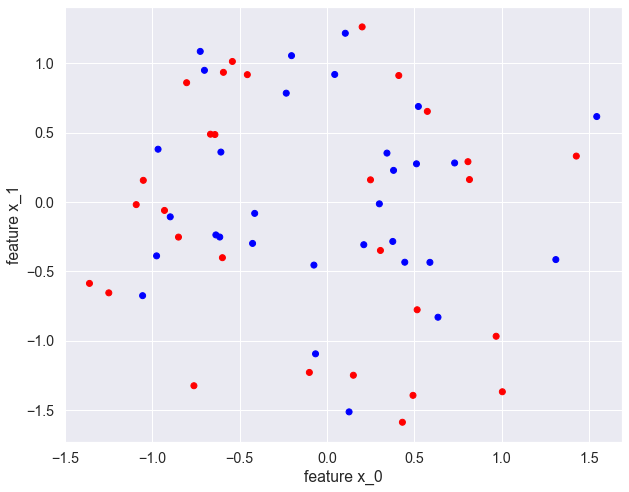

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = .40, 
                                                    random_state = 60)

c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()

In [149]:
features = ["x_0", "x_1"]
labels = ["red", "blue"]
labels

['red', 'blue']

In [150]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=10)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

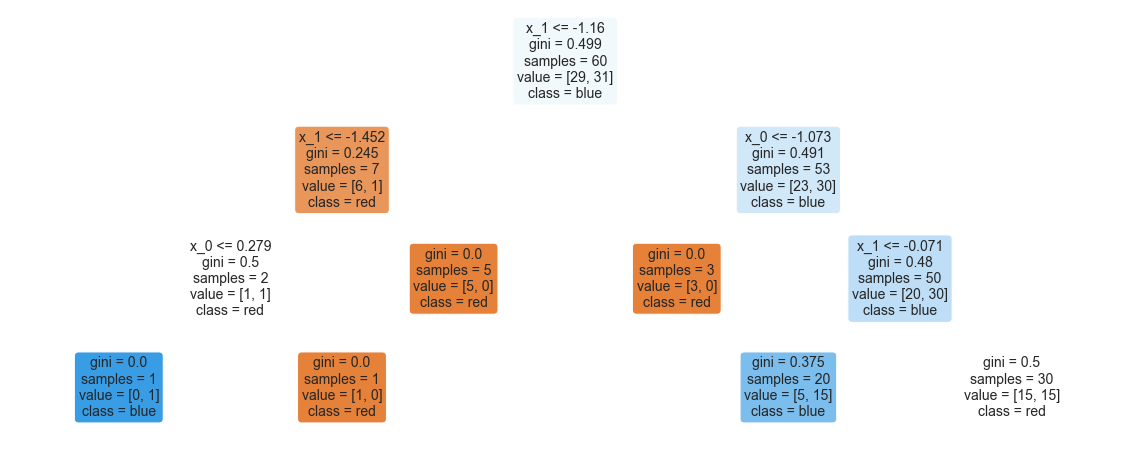

In [151]:
from sklearn import tree

plt.figure(figsize=(20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                    class_names = labels,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

Let's analyze the tree. First off, we notice that we only have 3 levels. This is because back when setting up our DecisionTree Classifier, we had set our depth to 3. Remember that we don't want to overfit our model so we usually want to set our depth to a low value. 
We begin at the first node. If x_1 is less than or equal to-1.16 then we split at that level. As we progress through the tree, some of our leafs are starting to become pure which is what we want. The lower the gini value is, the better. When a leaf is completly pure we get a class of the same kind, either blue or red.

In [165]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = features)
print(tree_rules)

|--- x_1 <= -1.16
|   |--- x_1 <= -1.45
|   |   |--- x_0 <= 0.28
|   |   |   |--- class: 1
|   |   |--- x_0 >  0.28
|   |   |   |--- class: 0
|   |--- x_1 >  -1.45
|   |   |--- class: 0
|--- x_1 >  -1.16
|   |--- x_0 <= -1.07
|   |   |--- class: 0
|   |--- x_0 >  -1.07
|   |   |--- x_1 <= -0.07
|   |   |   |--- class: 1
|   |   |--- x_1 >  -0.07
|   |   |   |--- class: 0



Lets see how well our model is at predicting labels.

Text(0, 0.5, 'feature: x_1')

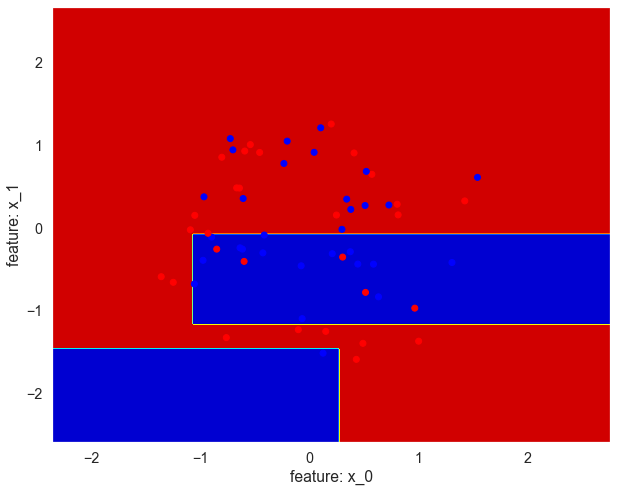

In [166]:
# Set a plot_step
plot_step = 0.02


plt.figure(figsize=(10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")

The blue and red area represents what the model thinks the region is mostly made up of, etiher mostly red values in the red region or blue values in the blue region. We can further anaylize this using a Confusion Matrix. This a good method to use as often times we want to know:

 * true positives -> predicted true and actually true
 * false positives -> predicted true and not actually true
 * false negatives -> predicted false but actually true
 * true negatives -> predicted false and actually false



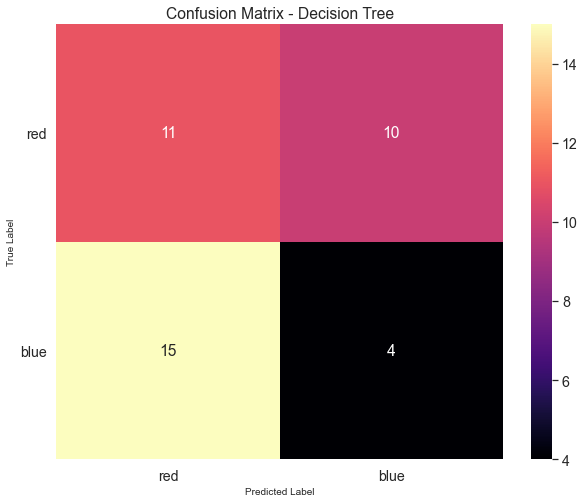

In [163]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma")

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=10)
ax.set_yticklabels(labels, rotation=0)
plt.show()

Reading our Confusion matrix, we get:

* Predicted red, actually red = 11
* Predicted blue, actually blue = 4
* Predicted red, actually blue = 15
* Predicted blue, actually red = 10

Our precision score can also tell us how well our model was at predicting red or blue.

In [170]:
print(f"precision score")
precision = metrics.precision_score(y_test, 
                                    test_pred_decision_tree,
                                   average = None)

precision_results = pd.DataFrame(precision, index=labels)
precision_results.rename(columns={0:"precision"}, inplace=True)
precision_results

precision score


,precision
red,0.423077
blue,0.285714


<p>The model was 42% accurate in predicting red and 28% accurate in predicting blue. A very inportant mesaurement is recall, specificity and f1-score.</p>
<p>Recall (also known as sensivity) is a measurement of how many of the positive cases the classifier correctly predicted. This would be the true positives.</p>
<p>Specificity is a measurements of the true negatives. In other words, it is a measurement of how many negative predictions are correct.</p>
<p>F1-score is a combination of both these measurements, specificty and recall. In essence, it is a way of calculating an average of values. Some advantages of using this metric is that helps balance the two metrics. For instance, if you choose the positive class as the one with fewer samples, f1-score can help balance the metric across positive/negative samples. </p>

Lets take a look at these metrics in our model.

In [172]:
print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.42      0.52      0.47        21
           1       0.29      0.21      0.24        19

    accuracy                           0.38        40
   macro avg       0.35      0.37      0.36        40
weighted avg       0.36      0.38      0.36        40



From our metrics, our f1-score is .47

# Better Values 

We can improve our model by changing the hyperparameters used in our model using GridSearchCV.

In [173]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    dtc = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )
    dtc.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(dtc.best_params_)
    print()
    print("Grid scores on development set:")
    means = dtc.cv_results_["mean_test_score"]
    stds = dtc.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 dtc.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 3, 'min_samples_split': 2}

Grid scores on development set:
0.438 (+/-0.110) for {'max_depth': 1, 'min_samples_split': 2}
0.438 (+/-0.110) for {'max_depth': 1, 'min_samples_split': 4}
0.438 (+/-0.110) for {'max_depth': 1, 'min_samples_split': 6}
0.438 (+/-0.110) for {'max_depth': 1, 'min_samples_split': 8}
0.438 (+/-0.110) for {'max_depth': 1, 'min_samples_split': 10}
0.477 (+/-0.253) for {'max_depth': 2, 'min_samples_split': 2}
0.477 (+/-0.253) for {'max_depth': 2, 'min_samples_split': 4}
0.477 (+/-0.253) for {'max_depth': 2, 'min_samples_split': 6}
0.477 (+/-0.253) for {'max_depth': 2, 'min_samples_split': 8}
0.477 (+/-0.253) for {'max_depth': 2, 'min_samples_split': 10}
0.503 (+/-0.106) for {'max_depth': 3, 'min_samples_split': 2}
0.503 (+/-0.106) for {'max_depth': 3, 'min_samples_split': 4}
0.503 (+/-0.106) for {'max_depth': 3, 'min_samples_split': 6}
0.503 (+/-0.106) for {'max_depth': 

From our model, we find that best hyperparameters are found at 'max_depth: 3', 'min_samples_split:2'. Lets plug them in and see how it does.

In [174]:
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_split = 2, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Text(0, 0.5, 'feature: x_1')

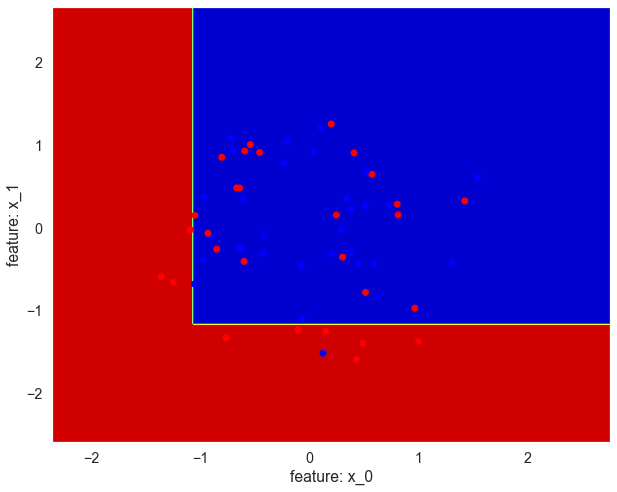

In [175]:
# Set a plot_step
plot_step = 0.02


plt.figure(figsize=(10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")

From the looks of it, the model did a much better job at classifying the red and blue values. 